# <font color = LightGreen > **CA model of water dynamics and hydrophobic interactions** </font>

Authors:
- H. Malash, 15179192
- S. Bhusal, 14724383
- L. Pahladsingh, 13846566
- T. Glansdorp, 12748587

In [2]:
from model import CA_rules, CA_grid
from analysis import calculate_attributes, count_neighbours
import analysis
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc

## <font color = LightBlue > **Background Information** </font>

Our cellular automaton (CA) model simulating an aqueous solution consists of a grid, representing the surface of a torus. Each cell, denoted as '$\textit{i}$' is surrounded by four neighbors '$\textit{j}$ ', and there is an additional cell two positions beyond '$\textit{i}$ ', labeled as '$\textit{k}$ '. We interpret the cell indicated by 'j' as the von Neumann neighborhood, and the cell indicated by 'k' as the extended von Neumann neighborhood.

The state of each cell, represented by binary numbers, signifies its occupancy. There are three possible options for occupancy within the system:

- An empty cell is denoted by 0.
- A cell containing water is indicated by 1.
- A cell containing solute is indicated by 2.

In our model, two parameters influence the movement of molecules within the grid: the $\textbf{breaking probability}$ ($P_B$) and the $\textbf{joining probability}$ ($J$). The combination of these probabilities determines the behavior of cell movement.

The $\textbf{breaking probability}$ ($P_B$) represents the probability of a molecule in cell $\textit{i}$ breaking away from a molecule in cell $\textit{j}$ when only one $\textit{j}$ cell is occupied. We have defined three specific breaking probabilities:

- $P_B(W)$: Water-water breaking probability
- $P_B(L)$: Solute-solute breaking probability
- $P_B(WL)$: Water-solute breaking probability

The  $\textbf{joining probability}$ ($J$) quantifies the ratio between the likelihood of a molecule at $\textit{i}$  moving towards an occupied $\textit{k}$ cell when $\textit{j}$  is empty and the probability of the same molecule at $\textit{i}$  moving towards an empty $\textit{k}$  cell when $\textit{j}$  is unoccupied. 

 is a positive number, when ($J=1$), it indicated that a molecule at $\textit{i}$ has the same probability to move towards an occupied $\textit{k}$ as when $\textit{k}$ is empty. So the state of cell $\textit{k}$ does not matter. 

The parameter ($J$) is a positive number. When $J=1$, it signifies that a molecule at $\textit{i}$ has an equal probability of moving towards an occupied $\textit{k}$ as when $\textit{k}$ is empty. In this case, the state of cell $\textit{k}$ does not influence the movement probability. As before we have three distinct joining probabilities: $J(W)$, $J(L)$ and $J(WL)$.

### <font> **Moving probability** </font> 
Combining $P_B$ and $J$, we obtaining the moving probability of a cell $p_m$: </br>
$p_m$ = sum of $p_m(d)$ over all possible $\textit{d}$ if the sum <1,
else 1 </br>

with

$p_m(d) = 1 / (1 + ((4-n)/(P_B^n) - 1) / J(d)) $ </br>
if n < 4 and $P_B$ > 0  </br>

$\textit{n}$ indicating the number of occupied $\textit{j}$ cells, there are $4-n$ directions for $\textit{i}$ to move. 

In the case where $J=1$, the moving probability ($p_m$) is equal to $P_B^n$. Given that all our research accepts this condition, we will focus on working with joint probabilities involving only $P_B$ to calculate the moving probability of a molecule.

$\textit{Information mainly based on}$: </br>
Kier, L. B., & Cheng, C. K. (1994). A Cellular Automata Model of an Aqueous Solution, Journal of Chemical Information and Computer Science.  34, 1334-1337


## <font color = LightBlue > **Water Grid** </font>

Below we perform simulation on a grid containing only 'water' molecules and empty space. The grid lattice is 55x55 and its space is 69% occupied with water molecules and 31% is empty. We vary the Water-Water breaking probability from 0 to 1. The objective is to quantify the number of neighboring water molecules surrounding each individual water molecule within the grid. An unbound water molecule is defined as one that lacks neighboring water molecules in the simulation grid.. Furthermore, a water molecule can be surrounded by one, two, three or four other water molecules. 

In [3]:
pbw_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] 
results = []

runs = 5

all_results = {pbw: [] for pbw in pbw_values}
total_molecules = 2087 # 55x55x0.69

for pbw_value in pbw_values:
    
    pbw_results = []

    for run in range(runs):
        print(f"Running simulation with {pbw_value} pbw value.")
        ca_grid = CA_grid(solute_amount=0)
        ca_rules = CA_rules(ca_grid, pbw=pbw_value)

        final_grid = ca_rules.generate_simulation()

        f_o, f_1, f_2, f_3, f_4 = calculate_attributes(grid=ca_grid, rules=ca_rules)
        pbw_results.append(np.array([f_o, f_1, f_2, f_3, f_4]))

    pbw_results = np.array(pbw_results)

    average_results = np.mean(pbw_results, axis=0)
    std_dev_results = np.std(pbw_results, axis=0)

    all_results[pbw_value] = {
        'average': average_results,
        'std_dev': std_dev_results
    }

for pbw_value, data in all_results.items():
    print(f"Pbw value: {pbw_value}")
    print(f"Average: {data['average']}")
    print(f"Standard Deviation: {data['std_dev']}")
    print()

Running simulation with 0.1 pbw value.
Running simulation with 0.1 pbw value.
Running simulation with 0.1 pbw value.
Running simulation with 0.1 pbw value.
Running simulation with 0.1 pbw value.
Running simulation with 0.2 pbw value.
Running simulation with 0.2 pbw value.
Running simulation with 0.2 pbw value.
Running simulation with 0.2 pbw value.
Running simulation with 0.2 pbw value.
Running simulation with 0.3 pbw value.
Running simulation with 0.3 pbw value.
Running simulation with 0.3 pbw value.
Running simulation with 0.3 pbw value.
Running simulation with 0.3 pbw value.
Running simulation with 0.4 pbw value.
Running simulation with 0.4 pbw value.
Running simulation with 0.4 pbw value.
Running simulation with 0.4 pbw value.
Running simulation with 0.4 pbw value.
Running simulation with 0.5 pbw value.
Running simulation with 0.5 pbw value.
Running simulation with 0.5 pbw value.
Running simulation with 0.5 pbw value.
Running simulation with 0.5 pbw value.
Running simulation with 0

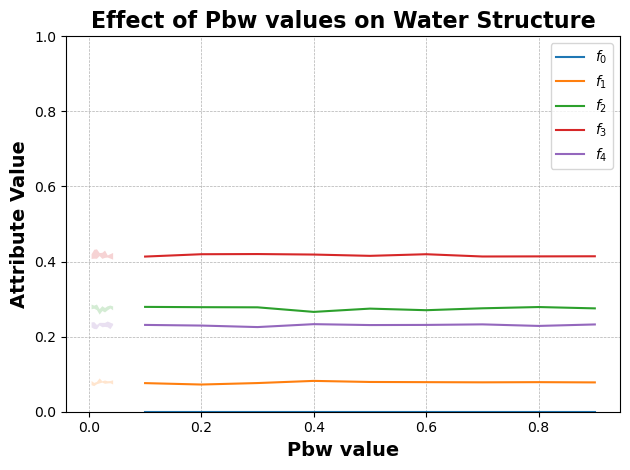

In [4]:
for i, attribute in enumerate(['$f_0$', '$f_1$', '$f_2$', '$f_3$', '$f_4$']):
    averages = [all_results[pbw]['average'][i] for pbw in pbw_values]
    std_devs = [all_results[pbw]['std_dev'][i] for pbw in pbw_values]
    
    num_runs = 5
    confidence_interval = 1.96 * np.array(std_devs) / np.sqrt(num_runs)
    
    lower_bound = np.array(averages) - confidence_interval
    upper_bound = np.array(averages) + confidence_interval

    plt.plot(np.array(pbw_values), averages, label=attribute)
    plt.fill_between(np.array(pbw_values), lower_bound, upper_bound, alpha=0.2)

# / 2087 * 100   
plt.xlabel('Pbw value', fontsize=14, fontweight='bold')
plt.ylabel('Attribute Value', fontsize=14, fontweight='bold')
plt.ylim(0, 1)  
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Effect of Pbw values on Water Structure', fontsize=16, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()  

## <font color = LightBlue > **Water-Solute Grid: Part I** </font>

### Effect of solute concentration on water bonds

In this simulation, we systematically manipulate the solute concentration, observing its impact on the number of water bonds. For each water molecule, we quantify the count of other water molecules with which it forms bonds ( zero bonds, one , two, three of four). At all times, the grid consists of 69% water and solute and 31% empty cavities (55x55 lattice).

In [ ]:
solute_concentrations = [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900]
results = []
runs = 5

all_results = {solute: [] for solute in solute_concentrations}
total_molecules = 2087 # 55x55x0.69

for solute_amount in solute_concentrations:

    solute_results = []

    for run in range(runs):
        print(f"Running simulation with {solute_amount} solute molecules.")
        ca_grid = CA_grid(solute_amount=solute_amount)
        ca_rules = CA_rules(ca_grid, pbwl=0.8)

        final_grid = ca_rules.generate_simulation()

        f_o, f_1, f_2, f_3, f_4 = calculate_attributes(grid=ca_grid, rules=ca_rules)
        solute_results.append(np.array([f_o, f_1, f_2, f_3, f_4]))


    solute_results = np.array(solute_results)

    average_results = np.mean(solute_results, axis=0)
    std_dev_results = np.std(solute_results, axis=0)

    all_results[solute_amount] = {
        'average': average_results,
        'std_dev': std_dev_results
    }

for solute, data in all_results.items():
    print(f"Solute concentration: {solute}")
    print(f"Average: {data['average']}")
    print(f"Standard Deviation: {data['std_dev']}")
    print()

In [ ]:
for i, attribute in enumerate(['$f_0$', '$f_1$', '$f_2$', '$f_3$', '$f_4$']):
    averages = [all_results[solute]['average'][i] for solute in solute_concentrations]
    std_devs = [all_results[solute]['std_dev'][i] for solute in solute_concentrations]

    num_runs = 5
    confidence_interval = 1.96 * np.array(std_devs) / np.sqrt(num_runs)

    lower_bound = np.array(averages) - confidence_interval
    upper_bound = np.array(averages) + confidence_interval

    plt.plot(np.array(solute_concentrations) / 2087 * 100, averages, label=attribute)
    plt.fill_between(np.array(solute_concentrations) / 2087 * 100, lower_bound, upper_bound, alpha=0.2)

plt.xlabel('Solute Concentration (%)', fontsize=14, fontweight='bold')
plt.ylabel('Attribute Value', fontsize=14, fontweight='bold')
plt.ylim(0, 1)  
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Effect of Solute Concentration on Water Structure', fontsize=16, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout() 

**<font color = Red > From this point forward, our focus is on identifying emergent properties, specifically the attainment of a steady state and the formation of clusters. To achieve this, we employ the function $\textit{count_neighbors}$, which assigns a +1 to a molecule if it is surrounded by molecules of the same cell type and a -1 if it is surrounded by molecules of a different cell type. </font>**



### Varying water without solute

In the following simulation we vary the Water-Water breaking probability in a configuration without any solute molecules. The grid consists in this configuration of 69% water and 31% empty cavities. We perform this simulation to see the effect of the Water-Water breaking probability on reaching the emergent properties in a configuration without any solute. The first code block below performs the simulation, the second code block below returns a graph.

In [5]:
pbw_values = [0.0, 0.1, 0.2, 0.3, 0.32, 0.34, 0.36, 0.38, 0.4, 0.42, 0.44, 0.46, 0.48, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] 
results = []

runs = 5

all_results_no_solute = {pbw: [] for pbw in pbw_values}
total_molecules = 2087 # 55x55x0.69

for pbw_value in pbw_values:
    
    pbw_results = []

    for run in range(runs):
        print(f"Running simulation with {pbw_value} pbw value.")
        ca_grid = CA_grid(solute_amount=0)
        ca_rules = CA_rules(ca_grid, pbw=pbw_value, pbl_parameter=False, pbwl_parameter=False)

        final_grid = ca_rules.generate_simulation(pbw=pbw_value)

        count = count_neighbours(ca_grid.grid, ca_grid.height, ca_grid.width, cell_type=1)
        pbw_results.append(count)
        #plt.imshow(final_grid)
        #plt.show()

    pbw_results = np.array(pbw_results)
    print(pbw_results)

    average_results = np.mean(pbw_results, axis=0)
    std_dev_results = np.std(pbw_results, axis=0)

    all_results_no_solute[pbw_value] = {
        'average': average_results,
        'std_dev': std_dev_results
    }

for pbw_value, data in all_results_no_solute.items():
    print(f"Pbw value: {pbw_value}")
    print(f"Average: {data['average']}")
    print(f"Standard Deviation: {data['std_dev']}")
    print()

Running simulation with 0.0 pbw value.
Running simulation with 0.0 pbw value.
Running simulation with 0.0 pbw value.
Running simulation with 0.0 pbw value.
Running simulation with 0.0 pbw value.
[4052 4264 4184 4244 4088]
Running simulation with 0.1 pbw value.
Running simulation with 0.1 pbw value.
Running simulation with 0.1 pbw value.
Running simulation with 0.1 pbw value.
Running simulation with 0.1 pbw value.
[5900 5592 6020 5756 5800]
Running simulation with 0.2 pbw value.
Running simulation with 0.2 pbw value.
Running simulation with 0.2 pbw value.
Running simulation with 0.2 pbw value.
Running simulation with 0.2 pbw value.
[7252 7160 6732 7012 7160]
Running simulation with 0.3 pbw value.
Running simulation with 0.3 pbw value.
Running simulation with 0.3 pbw value.
Running simulation with 0.3 pbw value.
Running simulation with 0.3 pbw value.
[7656 7492 7364 7412 7540]
Running simulation with 0.32 pbw value.
Running simulation with 0.32 pbw value.
Running simulation with 0.32 pbw

The plot shows the varying Water-Water breaking probability, $P_b(W)$, on the x-axis and the average neighbour count over 5 runs on the y-axis.

In [ ]:
pbw_values_percent = [value for value in pbw_values]  # Convert to percentage

# Extract averages and standard deviations for plotting
averages = [all_results_no_solute[pbw]['average'] for pbw in pbw_values]
std_devs = [all_results_no_solute[pbw]['std_dev'] for pbw in pbw_values]

# Calculate confidence interval for error bars
num_runs = 5
confidence_interval = 1.96 * np.array(std_devs) / np.sqrt(num_runs)

# Calculate lower and upper bounds for the confidence interval
lower_bound = np.array(averages) - confidence_interval
upper_bound = np.array(averages) + confidence_interval

# Plotting
plt.plot(pbw_values_percent, averages, label='Neighbor Count')
plt.fill_between(pbw_values_percent, lower_bound, upper_bound, alpha=0.2)

# Setting plot attributes
plt.xlabel('$P_b(w)$', fontsize=14, fontweight='bold')
plt.ylabel('Average Neighbor Count', fontsize=14, fontweight='bold')
plt.title('Effect of $P_b(w)$ on Neighbour Count', fontsize=16, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# plt.legend(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.figure(dpi=300)
plt.show()

### Varying water with solute

In the following simulation we vary the Water-Water breaking probability in a configuration with 100 solute molecules. The grid consists in this configuration of 69% water and solute and 31% empty cavities. We perform this simulation to see the effect of the Water-Water breaking probability on reaching the emergent properties in a configuration with a small amount of solute. The first code block below performs the simulation, the second code block below returns a graph.

In [ ]:
pbw_solute_values = [0.0, 0.1, 0.2, 0.3, 0.32, 0.34, 0.36, 0.38, 0.4, 0.42, 0.44, 0.46, 0.48, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] 
results_solute = []

runs = 5

all_results_solute = {pbw: [] for pbw in pbw_values}
total_molecules = 2087 # 55x55x0.69

for pbw_solute_value in pbw_solute_values:
    
    pbw_solute_results = []

    for run in range(runs):
        print(f"Running simulation with {pbw_solute_value} pbw value.")
        ca_grid = CA_grid(solute_amount=100)
        ca_rules = CA_rules(ca_grid, pbw=pbw_solute_value, pbl_parameter=False, pbwl_parameter=False)

        final_grid = ca_rules.generate_simulation(pbw=pbw_solute_value)

        count = count_neighbours(ca_grid.grid, ca_grid.height, ca_grid.width, cell_type=1)
        pbw_solute_results.append(count)

    pbw_solute_results = np.array(pbw_solute_results)
    print(pbw_solute_results)

    average_results_solute = np.mean(pbw_solute_results, axis=0)
    std_dev_results_solute = np.std(pbw_solute_results, axis=0)

    all_results_solute[pbw_solute_value] = {
        'average': average_results_solute,
        'std_dev': std_dev_results_solute
    }

for pbw_solute_value, data in all_results_solute.items():
    print(f"Pbw value: {pbw_solute_value}")
    print(f"Average: {data['average']}")
    print(f"Standard Deviation: {data['std_dev']}")
    print()

The plot shows the varying Water-Water breaking probability, $P_b(W)$, on the x-axis and the average neighbour count over 5 runs on the y-axis.

In [ ]:
pbw_solute_values_percent = [value for value in pbw_solute_values]  # Convert to percentage

# Extract averages and standard deviations for plotting
averages_solute = [all_results_solute[pbw]['average'] for pbw in pbw_solute_values]
std_devs_solute = [all_results_solute[pbw]['std_dev'] for pbw in pbw_solute_values]

# Calculate confidence interval for error bars
num_runs = 5
confidence_interval_solute = 1.96 * np.array(std_devs_solute) / np.sqrt(num_runs)

# Calculate lower and upper bounds for the confidence interval
lower_bound_solute = np.array(averages_solute) - confidence_interval_solute
upper_bound_solute = np.array(averages_solute) + confidence_interval_solute

# Plotting
plt.plot(pbw_solute_values_percent, averages_solute, label='Neighbor Count')
plt.fill_between(pbw_solute_values_percent, lower_bound_solute, upper_bound_solute, alpha=0.2)

# Setting plot attributes
plt.xlabel('$P_b(w)$', fontsize=14, fontweight='bold')
plt.ylabel('Average Neighbor Count', fontsize=14, fontweight='bold')
plt.title('Effect of $P_b(w)$ on Neighbour Count', fontsize=16, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# plt.legend(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.figure(dpi=300)
plt.show()

Combining the two plots to better showcase the difference between the neighbour count with and without inert solute cells added to the grid.

In [ ]:
### 2 plots 1 graph
# Plotting
plt.plot(pbw_solute_values_percent, averages_solute, label='Neighbor Count')
plt.plot(pbw_values_percent, averages, label='Neighbor Count')
plt.fill_between(pbw_solute_values_percent, lower_bound_solute, upper_bound_solute, alpha=0.2)
plt.fill_between(pbw_values_percent, lower_bound, upper_bound, alpha=0.2)

# Setting plot attributes
plt.xlabel('$P_b(w)$', fontsize=14, fontweight='bold')
plt.ylabel('Average Neighbor Count', fontsize=14, fontweight='bold')
plt.ylim(3000, 8000)
plt.title('Effect of $P_b(w)$ on Neighbour Count', fontsize=16, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10, labels = ['Solute = 100', 'No solute'])
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.figure(dpi=300)
plt.show()

## Varying solute breaking probability with fixed water breaking probability

From the previous simulations we concluded that a Water-Water breaking probability of $P_b(W) = 0.4$ brings the model in to a steady state for low solute amounts. We keep the steady state and vary the Solute-Solute breaking probability to see the effect of this parameter on the configuration. Summarizing the configuration: Varying $P_b(L)$ from 0 to 1, keeping $P_b(W) = 0.4$ constant, with 100 solute molecules.  

In [ ]:
pbl_values = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] 
results = []

runs = 5

all_results = {pbl: [] for pbl in pbl_values}
total_molecules = 2087 # 55x55x0.69

for pbl_value in pbl_values:
    
    pbl_results = []

    for run in range(runs):
        print(f"Running simulation with {pbl_value} pbwl value.")
        ca_grid = CA_grid()
        ca_rules = CA_rules(ca_grid, pbw=0.4, pbl=pbl_value, pbl_parameter=True, pbwl_parameter=False)

        final_grid = ca_rules.generate_simulation(pbl=pbl_value, pbw=0.4)

        count = count_neighbours(ca_grid.grid, ca_grid.height, ca_grid.width, cell_type=1)
        pbl_results.append(count)

    pbl_results = np.array(pbl_results)
    print(pbl_results)

    average_results = np.mean(pbl_results, axis=0)
    std_dev_results = np.std(pbl_results, axis=0)

    all_results[pbl_value] = {
        'average': average_results,
        'std_dev': std_dev_results
    }

for pbwl_value, data in all_results.items():
    print(f"pbwl value: {pbwl_value}")
    print(f"Average: {data['average']}")
    print(f"Standard Deviation: {data['std_dev']}")
    print()

The plot shows the varying $P_b(L)$ on the x-axis and the average neighbour count on the y-axis. (Configuration contains 100 solute molecules.)

In [ ]:
pbl_values_percent = [value for value in pbl_values]  # Convert to percentage

# Extract averages and standard deviations for plotting
averages = [all_results[pbl]['average'] for pbl in pbl_values]
std_devs = [all_results[pbl]['std_dev'] for pbl in pbl_values]

# Calculate confidence interval for error bars
num_runs = 5
confidence_interval = 1.96 * np.array(std_devs) / np.sqrt(num_runs)

# Calculate lower and upper bounds for the confidence interval
lower_bound = np.array(averages) - confidence_interval
upper_bound = np.array(averages) + confidence_interval

# Plotting
plt.figure(figsize=(16, 10), dpi=300)
plt.plot(pbl_values_percent, averages, label='Neighbor Count')
plt.fill_between(pbl_values_percent, lower_bound, upper_bound, alpha=0.2)

# Setting plot attributes
plt.xlim([0, 1])
plt.ylim([3000, 8000])
plt.xlabel('$P_b(WL)$', fontsize=20, fontweight='bold')
plt.ylabel('Average Neighbor Count', fontsize=20, fontweight='bold')
plt.title('Effect of $P_b(WL)$ on Neighbour Count', fontsize=30, fontweight='bold')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.legend(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

## Varying water solute breaking probability with fixed water breaking probability

In this simulation we do the same as in the previous simulation, but instead of Solute-Solute breaking probability, we now vary Water-Solute breaking probability. So, we keep the steady state and vary the Water-Solute breaking probability to see the effect of this parameter on the configuration. Summarizing the configuration: Varying $P_b(WL)$ from 0 to 1, keeping $P_b(W) = 0.4$ constant, with 100 solute molecules.  

In [ ]:
pbwl_values = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] 
results = []

runs = 5

all_results = {pbwl: [] for pbwl in pbwl_values}
total_molecules = 2087 # 55x55x0.69

for pbwl_value in pbwl_values:
    
    pbwl_results = []

    for run in range(runs):
        print(f"Running simulation with {pbwl_value} pbwl value.")
        ca_grid = CA_grid()
        ca_rules = CA_rules(ca_grid, pbw=0.4, pbwl=pbwl_value, pbl_parameter=False, pbwl_parameter=True)

        final_grid = ca_rules.generate_simulation(pbwl=pbwl_value, pbw=0.4)

        count = count_neighbours(ca_grid.grid, ca_grid.height, ca_grid.width, cell_type=1)
        pbwl_results.append(count)

    pbwl_results = np.array(pbwl_results)
    print(pbwl_results)

    average_results = np.mean(pbwl_results, axis=0)
    std_dev_results = np.std(pbwl_results, axis=0)

    all_results[pbwl_value] = {
        'average': average_results,
        'std_dev': std_dev_results
    }

for pbwl_value, data in all_results.items():
    print(f"pbwl value: {pbwl_value}")
    print(f"Average: {data['average']}")
    print(f"Standard Deviation: {data['std_dev']}")
    print()

The plot shows the varying $P_b(WL)$ on the x-axis and the average neighbour count on the y-axis. (Configuration contains 100 solute molecules.)

In [ ]:
pbwl_values_percent = [value for value in pbwl_values]  # Convert to percentage

# Extract averages and standard deviations for plotting
averages = [all_results[pbwl]['average'] for pbwl in pbwl_values]
std_devs = [all_results[pbwl]['std_dev'] for pbwl in pbwl_values]

# Calculate confidence interval for error bars
num_runs = 5
confidence_interval = 1.96 * np.array(std_devs) / np.sqrt(num_runs)

# Calculate lower and upper bounds for the confidence interval
lower_bound = np.array(averages) - confidence_interval
upper_bound = np.array(averages) + confidence_interval

# Plotting
plt.figure(figsize=(16, 10), dpi=300)
plt.plot(pbwl_values_percent, averages, label='Neighbor Count')
plt.fill_between(pbwl_values_percent, lower_bound, upper_bound, alpha=0.2)

# Setting plot attributes
plt.xlim([0, 1])
plt.ylim([3000, 8000])
plt.xlabel('$P_b(WL)$', fontsize=20, fontweight='bold')
plt.ylabel('Average Neighbor Count', fontsize=20, fontweight='bold')
plt.title('Effect of $P_b(WL)$ on Neighbour Count', fontsize=30, fontweight='bold')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.legend(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

#### <font color = DarkBlue > ***Intermezzo: Statistics*** </font>

This part compares the means of neighbours count obtained with the simulation in the case of water and inert solutes ($\textit{pbw_sol}$) with the means with varying $P_B(L)$ and $P_B(WL)$ respectively (moving solutes). The means for $\textit{pbw_sol}$  were ontained at $P_B(W)$ is 0.4 across five runs.

In [ ]:
import scipy.stats as stats

pwb_nosol = [8048, 7652, 7536, 7876, 7696]  # At pwb = 0.4
pwb_sol = [6642, 6580, 6474, 6804, 6274]  # At pwb = 0.4

pbl = [6454, 6594, 6738, 6408, 6532]
pbwl = [6870, 6558, 6684, 6762, 6470]

t_stat, p_value = stats.ttest_ind(pwb_sol, pbwl)
print(f"pbwl: T-statistic: {t_stat}, P-value: {p_value}")

t_stat, p_value = stats.ttest_ind(pwb_sol, pbl)
print(f"pbl: T-statistic: {t_stat}, P-value: {p_value}")


## <font color = LightBlue > **Water-Solute Grid: Part 2** </font>


## Varying water breaking probability and solute concentrations

In this configuration we vary the Water-Water breaking probability from 0 to 1 and we vary the solute concentration from 100, 200, 400, 600, 800. We do this to see the effect on the emergent properties as a result of varying the Water-Water breaking probability for different concentrations of solute in water.

In [ ]:
pbw_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]  
solute_concentrations = [100, 200, 400, 600, 800] 

results = []
runs = 1  

# Initialize dictionary to store results
all_results = {pbw: {solute: [] for solute in solute_concentrations} for pbw in pbw_values}

for pbw_value in pbw_values:
    for solute_concentration in solute_concentrations:
        pbw_results = []
        for run in range(runs):
            print(f"Running simulation with pbw value {pbw_value} and solute concentration {solute_concentration}.")
            ca_grid = CA_grid(solute_amount=solute_concentration)
            ca_rules = CA_rules(ca_grid, pbw=pbw_value, pbwl=0.0, pbl=0.0, pbwl_parameter=False, pbl_parameter=False) # change pbwl, pbw, pbl accordingly
            
            final_grid = ca_rules.generate_simulation(pbw=pbw_value)
            count = count_neighbours(ca_grid.grid, ca_grid.height, ca_grid.width, cell_type=1)
            pbw_results.append(count)

        # Calculate statistics for each set of runs
        average_results = np.mean(pbw_results)
        std_dev_results = np.std(pbw_results)
        all_results[pbw_value][solute_concentration] = {
            'average': average_results,
            'std_dev': std_dev_results
        }

# Output the results
for pbw_value, solute_data in all_results.items():
    for solute_concentration, stats in solute_data.items():
        print(f"Pbw value: {pbw_value}, Solute concentration: {solute_concentration}")
        print(f"Average Neighbour Count: {stats['average']}")
        print(f"Standard Deviation: {stats['std_dev']}\n")

The graph displays the varying $P_b(W)$ (x-axis) and the average neighbour count (y-axis) for different solute concentrations.

In [ ]:
# Plotting each solute concentration as a separate line with a confidence interval
for solute_concentration in solute_concentrations:
    averages = [all_results[pbw][solute_concentration]['average'] for pbw in pbw_values]
    std_devs = [all_results[pbw][solute_concentration]['std_dev'] for pbw in pbw_values]

    # Calculate confidence interval
    num_runs = runs
    confidence_interval = 1.96 * np.array(std_devs) / np.sqrt(num_runs)
    lower_bound = np.array(averages) - confidence_interval
    upper_bound = np.array(averages) + confidence_interval

    # Plot the average neighbor count
    plt.plot(pbw_values, averages, label=f'Solute: {solute_concentration}')
    plt.fill_between(pbw_values, lower_bound, upper_bound, alpha=0.2)

plt.xlabel('$P_b(W)$')
plt.ylabel('Average Neighbor Count')
plt.title('Effect of Pb(w) and Solute Concentration on Neighbour Count')
plt.legend()
plt.grid(True)

# plt.xlim(0, 100)
plt.ylim(bottom=0) 

plt.figure(dpi=300)

plt.show()

## Varying solute breaking probability and solute concentrations

In this configuration we vary the Solute-Solute breaking probability from 0 to 1 and we vary the solute concentration from 100, 200, 400, 600, 800. We do this to see the effect on the emergent properties as a result of varying the Solute-Solute breaking probability for different concentrations of solute in water.

In [ ]:
pbl_values = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] 
solute_concentrations = [ 100, 200, 400, 600, 800]

results = []

runs = 1

all_results = {pbl: {} for pbl in pbl_values}

for pbl_value in pbl_values:
    for solute_concentration in solute_concentrations:
    
        pbl_results = []

        for run in range(runs):
            print(f"Running simulation with {pbl_value} pbwl value and {solute_concentration} solute concentration.")
            ca_grid = CA_grid(solute_amount=solute_concentration)
            ca_rules = CA_rules(ca_grid, pbw=0.4, pbl=pbl_value, pbwl_parameter=False, pbl_parameter=True)

            final_grid = ca_rules.generate_simulation(pbl=pbl_value, pbw=0.4)

            count = count_neighbours(ca_grid.grid, ca_grid.height, ca_grid.width, cell_type=1)
            pbl_results.append(count)

        pbl_results = np.array(pbl_results)
        print(pbl_results)

        # Statistics for change in pbw;
        average_results_pbl = np.mean(pbl_results, axis=0) 
        std_dev_results_pbl = np.std(pbl_results, axis=0)

        all_results[pbl_value][solute_concentration] = {
            'average': average_results_pbl,
            'std_dev': std_dev_results_pbl
        }

for pbl_value, data in all_results.items():
    for solute_concentration, data in data.items():
        print(f"pbwl value: {pbl_value}")
        print(f"Solute concentration: {solute_concentration}")
        print(f"Average: {data['average']}")
        print(f"Standard Deviation: {data['std_dev']}")
        print()

The graph displays the varying $P_b(L)$ (x-axis) and the average neighbour count (y-axis) for different solute concentrations.

In [ ]:
# Plotting each solute concentration as a separate line with a confidence interval
for solute_concentration in solute_concentrations:
    averages = [all_results[pbl][solute_concentration]['average'] for pbl in pbl_values]
    std_devs = [all_results[pbl][solute_concentration]['std_dev'] for pbl in pbl_values]

    # Calculate confidence interval
    num_runs = runs
    confidence_interval = 1.96 * np.array(std_devs) / np.sqrt(num_runs)
    lower_bound = np.array(averages) - confidence_interval
    upper_bound = np.array(averages) + confidence_interval

    # Plot the average neighbor count
    plt.plot(pbl_values, averages, label=f'Solute: {solute_concentration}')
    plt.fill_between(pbl_values, lower_bound, upper_bound, alpha=0.2)

plt.xlabel('$P_b(L)$')
plt.ylabel('Average Neighbor Count')
plt.title('Effect of Pb(L) and Solute Concentration on Neighbour Count')
plt.legend()
plt.grid(True)

# plt.xlim(0, 100)
plt.ylim(bottom=0) 

plt.figure(dpi=300)

plt.show()

## Varying water solute breaking probability and solute concentrations

In this configuration we vary the Water-Solute breaking probability from 0 to 1 and we vary the solute concentration from 100, 200, 400, 600, 800. We do this to see the effect on the emergent properties as a result of varying the Water-Solute breaking probability for different concentrations of solute in water.

In [ ]:
pbwl_values = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] 
solute_concentrations = [ 100, 200, 400, 600, 800]

results = []

runs = 1

all_results = {pbwl: {} for pbwl in pbwl_values}

for pbwl_value in pbwl_values:
    for solute_concentration in solute_concentrations:
    
        pbwl_results = []

        for run in range(runs):
            print(f"Running simulation with {pbwl_value} pbwl value and {solute_concentration} solute concentration.")
            ca_grid = CA_grid(solute_amount=solute_concentration)
            ca_rules = CA_rules(ca_grid, pbw=0.4, pbwl=pbwl_value, pbl_parameter=False, pbwl_parameter=True)

            final_grid = ca_rules.generate_simulation(pbwl=pbwl_value, pbw=0.4)

            count = count_neighbours(ca_grid.grid, ca_grid.height, ca_grid.width, cell_type=1)
            pbwl_results.append(count)

        pbwl_results = np.array(pbwl_results)
        print(pbwl_results)

        # Statistics for change in pbw;
        average_results_pbwl = np.mean(pbwl_results, axis=0) 
        std_dev_results_pbwl = np.std(pbwl_results, axis=0)

        all_results[pbwl_value][solute_concentration] = {
            'average': average_results_pbwl,
            'std_dev': std_dev_results_pbwl
        }

for pbwl_value, data in all_results.items():
    for solute_concentration, data in data.items():
        print(f"pbwl value: {pbwl_value}")
        print(f"Solute concentration: {solute_concentration}")
        print(f"Average: {data['average']}")
        print(f"Standard Deviation: {data['std_dev']}")
        print()

The graph displays the varying $P_b(WL)$ (x-axis) and the average neighbour count (y-axis) for different solute concentrations.

In [ ]:
# Plotting each solute concentration as a separate line with a confidence interval
for solute_concentration in solute_concentrations:
    averages = [all_results[pbwl][solute_concentration]['average'] for pbwl in pbwl_values]
    std_devs = [all_results[pbwl][solute_concentration]['std_dev'] for pbwl in pbwl_values]

    # Calculate confidence interval
    num_runs = runs
    confidence_interval = 1.96 * np.array(std_devs) / np.sqrt(num_runs)
    lower_bound = np.array(averages) - confidence_interval
    upper_bound = np.array(averages) + confidence_interval

    # Plot the average neighbor count
    plt.plot(pbwl_values, averages, label=f'Solute: {solute_concentration}')
    plt.fill_between(pbwl_values, lower_bound, upper_bound, alpha=0.2)

plt.xlabel('$P_b(WL)$')
plt.ylabel('Average Neighbor Count')
plt.title('Effect of Pb(WL) and Solute Concentration on Neighbour Count')
plt.legend()
plt.grid(True)

# plt.xlim(0, 100)
plt.ylim(bottom=0) 

plt.figure(dpi=300)

plt.show()

## Varying solute concentration without the water breaking probability

In this configuration we want to examine the effect of increasing the solute concentration with the absence of the Water-Water breaking probability. The Water-Solute and Solute-Solute breaking probabilities are kept constant at respectively $P_b(WL) = 0.9$ and $P_b(L) = 0.9$.

In [25]:
solute_concentrations = [ 100, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
results = []

runs = 1

all_results = {solute_concentration: [] for solute_concentration in solute_concentrations}

for solute_concentration in solute_concentrations:
    
    solute_results = []

    for run in range(runs):
        print(f"Running simulation with {solute_concentration} solute concentration.")
        ca_grid = CA_grid(solute_amount=solute_concentration)
        ca_rules = CA_rules(ca_grid, pbwl=0.9, pbl=0.9, pbw_parameter=False, pbl_parameter=True, pbwl_parameter=True)

        final_grid = ca_rules.generate_simulation(pbl=0.9, pbwl=0.9)

        count = count_neighbours(ca_grid.grid, ca_grid.height, ca_grid.width, cell_type=1)
        solute_results.append(count)

    solute_results = np.array(solute_results)
    print(solute_results)

    average_results = np.mean(solute_results, axis=0)
    std_dev_results = np.std(solute_results, axis=0)

    all_results[solute_concentration] = {
        'average': average_results,
        'std_dev': std_dev_results
    }

for solute_concentration, data in all_results.items():
    print(f"Pbw value: {solute_concentration}")
    print(f"Average: {data['average']}")
    print(f"Standard Deviation: {data['std_dev']}")
    print()

Running simulation with 100 solute concentration.
[3154]
Running simulation with 200 solute concentration.
[2272]
Running simulation with 400 solute concentration.
[1436]
Running simulation with 600 solute concentration.
[798]
Running simulation with 800 solute concentration.
[768]
Running simulation with 1000 solute concentration.
[966]
Running simulation with 1200 solute concentration.
[1416]
Running simulation with 1400 solute concentration.
[1778]
Running simulation with 1600 solute concentration.
[2822]
Running simulation with 1800 solute concentration.
[4004]
Running simulation with 2000 solute concentration.
[5520]
Pbw value: 100
Average: 3154.0
Standard Deviation: 0.0

Pbw value: 200
Average: 2272.0
Standard Deviation: 0.0

Pbw value: 400
Average: 1436.0
Standard Deviation: 0.0

Pbw value: 600
Average: 798.0
Standard Deviation: 0.0

Pbw value: 800
Average: 768.0
Standard Deviation: 0.0

Pbw value: 1000
Average: 966.0
Standard Deviation: 0.0

Pbw value: 1200
Average: 1416.0
Stan

The graph displays the increasing solute concentration (x-axis) against the averageNeighbour Count (y-axis).

[3154.0, 2272.0, 1436.0, 798.0, 768.0, 966.0, 1416.0, 1778.0, 2822.0, 4004.0, 5520.0]
[4.791566842357451, 9.583133684714902, 19.166267369429804, 28.74940105414471, 38.33253473885961, 47.91566842357451, 57.49880210828942, 67.0819357930043, 76.66506947771921, 86.24820316243411, 95.83133684714902]


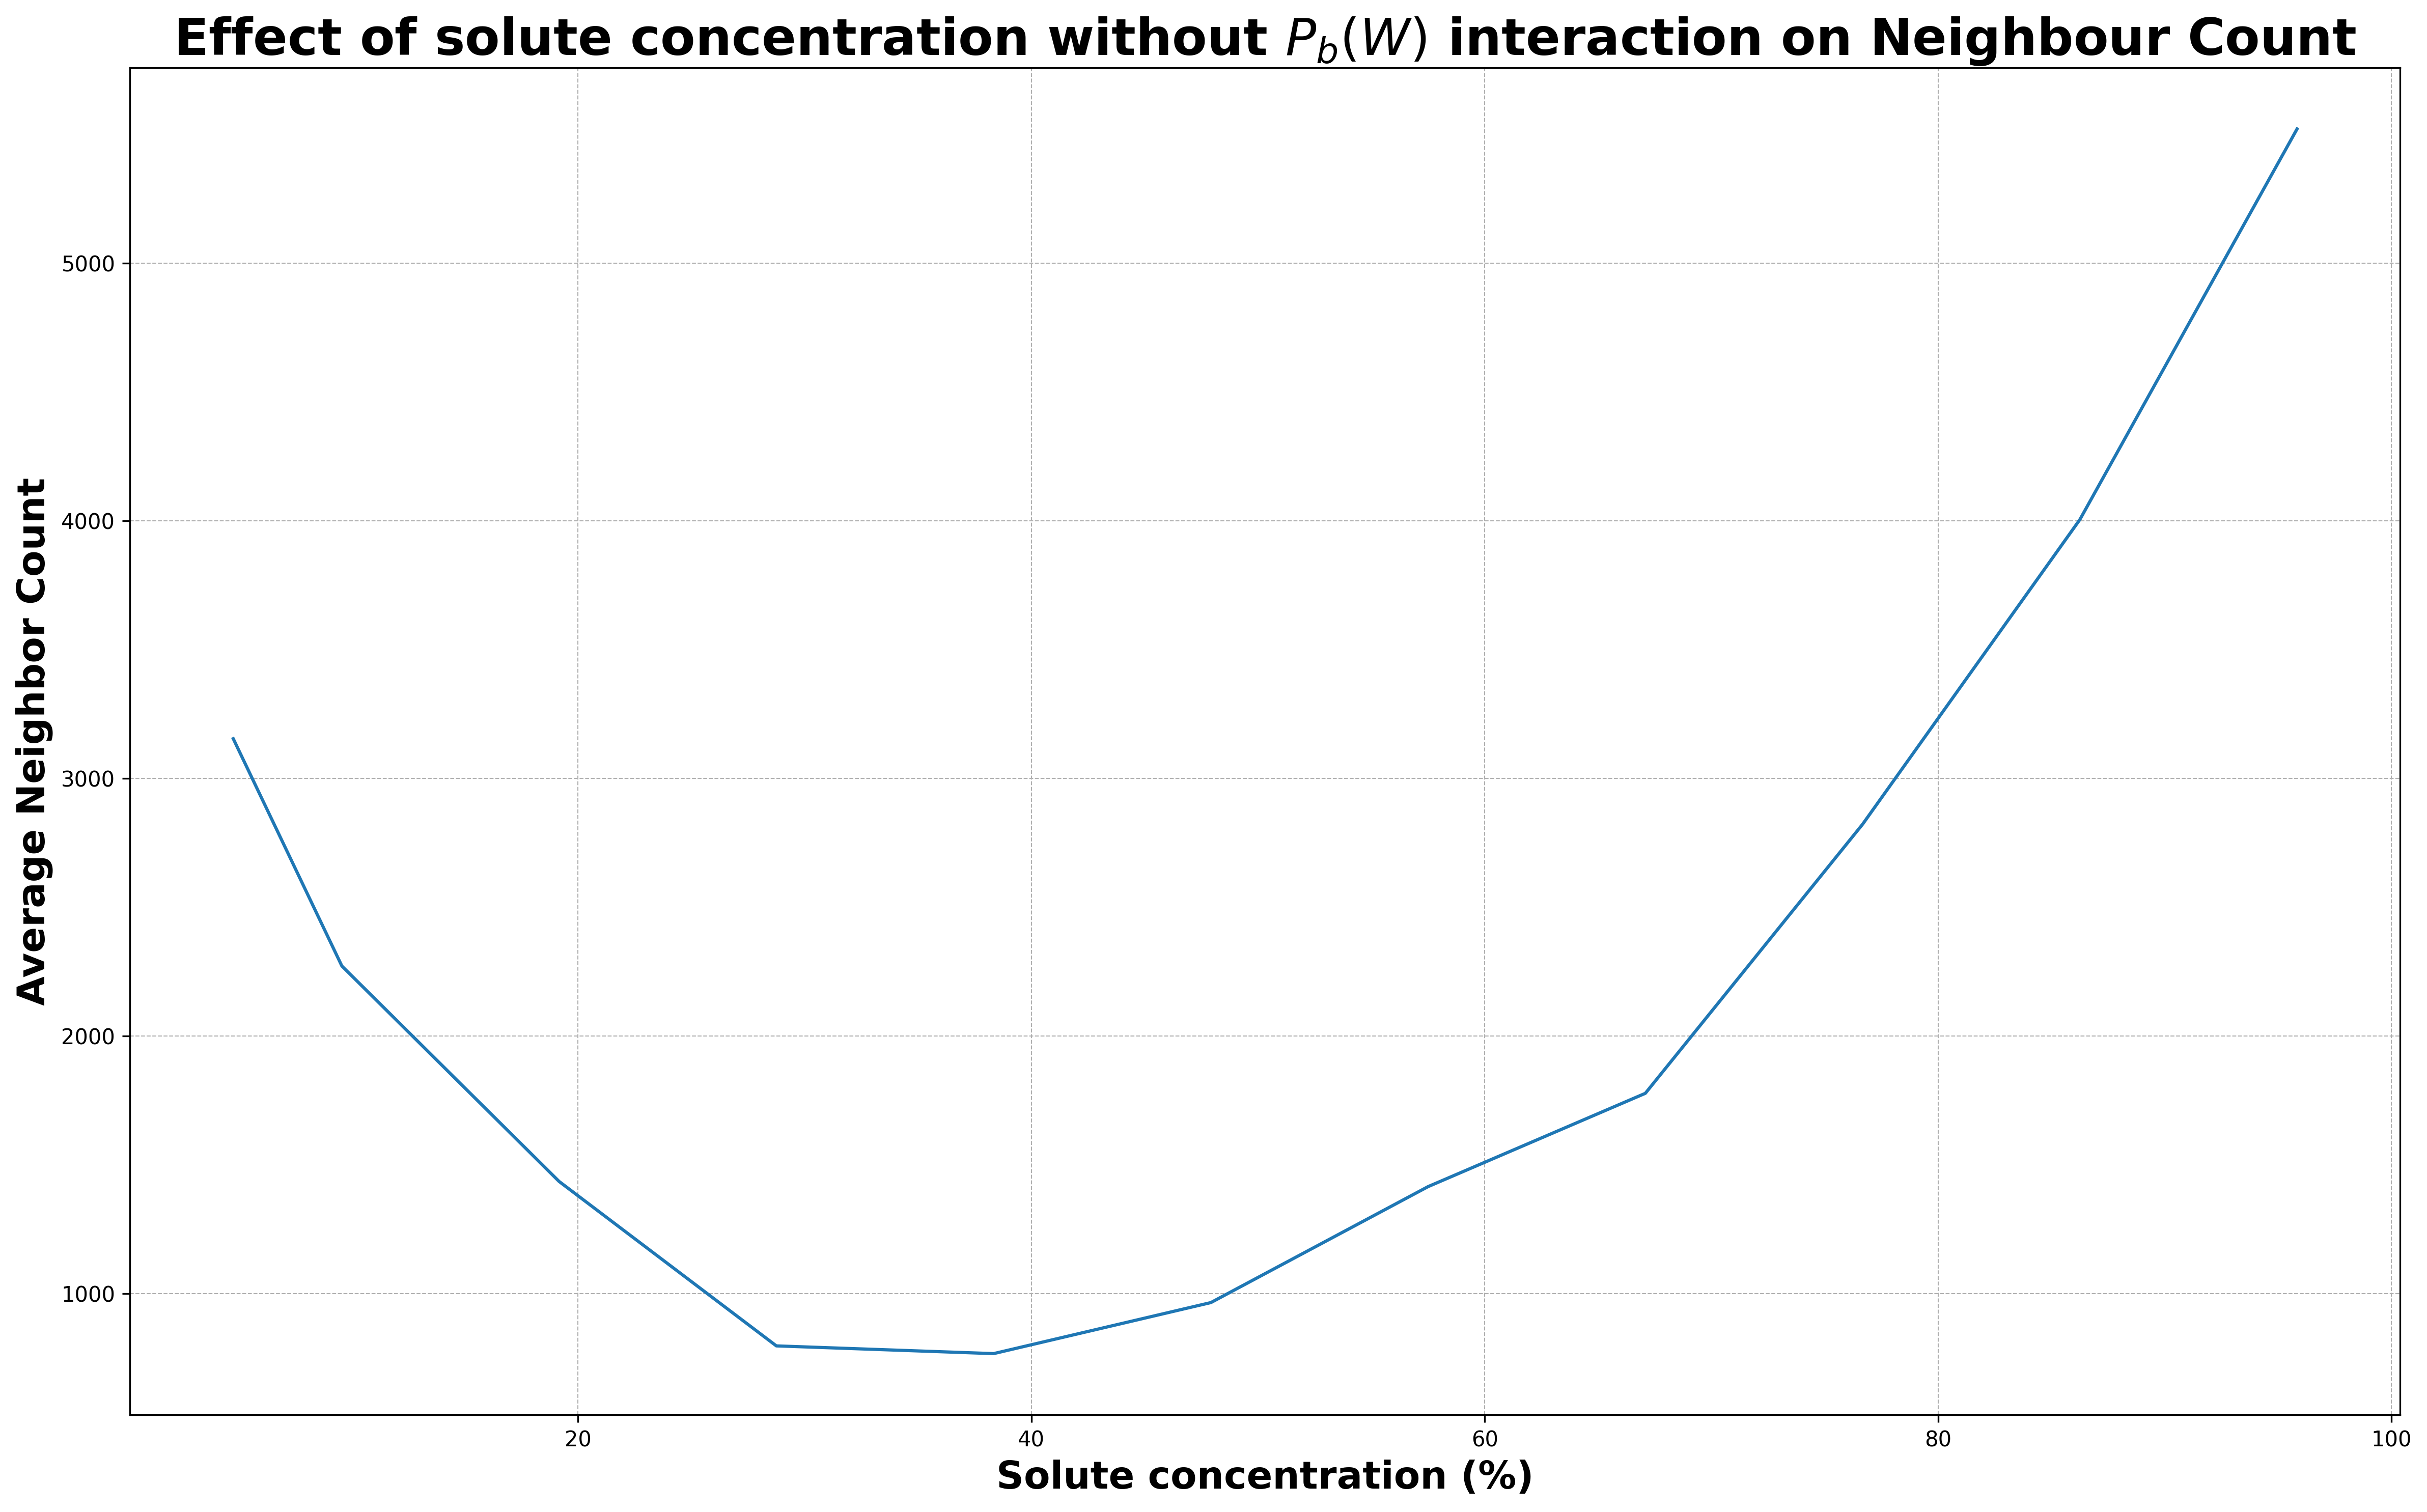

In [27]:
solute_values_percent = [value / 2087 * 100 for value in solute_concentrations]  # Convert to percentage

# Extract averages and standard deviations for plotting
averages = [all_results[solute_concentration]['average'] for solute_concentration in solute_concentrations]
std_devs = [all_results[solute_concentration]['std_dev'] for solute_concentration in solute_concentrations]
print(averages)
print(solute_values_percent)

# Calculate confidence interval for error bars
num_runs = 1
confidence_interval = 1.96 * np.array(std_devs) / np.sqrt(num_runs)

# Calculate lower and upper bounds for the confidence interval
lower_bound = np.array(averages) - confidence_interval
upper_bound = np.array(averages) + confidence_interval

plt.figure(dpi=300, figsize=(16, 10))


# Plotting
plt.plot(solute_values_percent, averages, label='Neighbor Count')
plt.fill_between(solute_values_percent, lower_bound, upper_bound, alpha=0.2)

# Setting plot attributes
plt.xlabel('Solute concentration (%)', fontsize=18, fontweight='bold')
plt.ylabel('Average Neighbor Count', fontsize=18, fontweight='bold')
plt.title('Effect of solute concentration without $P_b(W)$ interaction on Neighbour Count', fontsize=24, fontweight='bold')
#plt.xlim(0,1)
#plt.ylim(1000, 8000)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# plt.legend(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

### Visualization of the grid at different Water-Water breaking probability

In the grids below we show the configuration at $P_B(W)$ = [0.1, 0.4, 0.9], in order to show why we have chosen $P_B(W)$ = 0.4 as a steady state. At this number we clearly see the clusters formation of the cavities. The paramaters $P_B(L)$ and $P_B(WL)$ play no role here. 

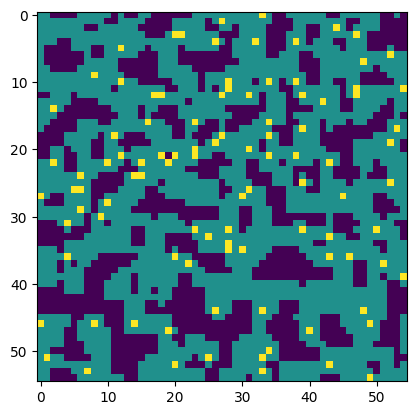

In [6]:
ca_grid = CA_grid(solute_amount=100)
ca_rules = CA_rules(ca_grid, pbw=0.1, pbl_parameter=False, pbwl_parameter=False)

final_grid = ca_rules.generate_simulation(pbw=0.1)

plt.imshow(final_grid)
plt.show()

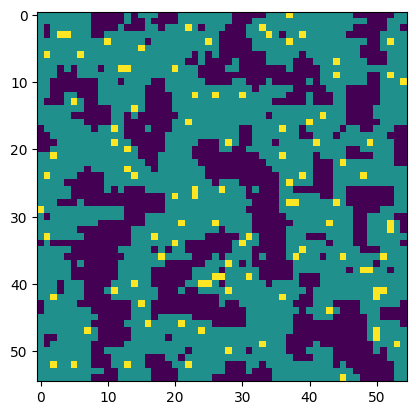

In [7]:
ca_grid = CA_grid(solute_amount=100)
ca_rules = CA_rules(ca_grid, pbw=0.4, pbl_parameter=False, pbwl_parameter=False)

final_grid = ca_rules.generate_simulation(pbw=0.4)

plt.imshow(final_grid)
plt.show()

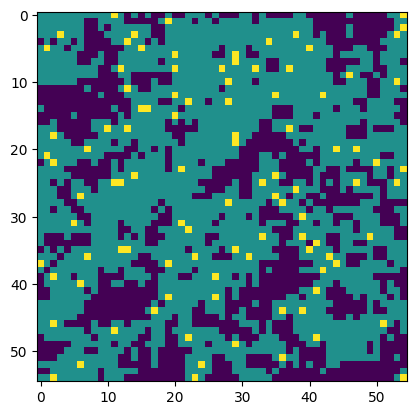

In [8]:
ca_grid = CA_grid(solute_amount=100)
ca_rules = CA_rules(ca_grid, pbw=0.9, pbl_parameter=False, pbwl_parameter=False)

final_grid = ca_rules.generate_simulation(pbw=0.9)

plt.imshow(final_grid)
plt.show()

## Varying Water-Solute and Solute-Solute Breaking Probabilities with 100 solute molecules

This configuration is to see if varying the Water-Solute and Solute-Solute breaking probabilities affect the emergent properties. The Water-Water breaking probability is kept constant at 0.4. The Water-SOlute and Solute-SOlute breaking probabilities vary from 0 to 1.

In [ ]:
pbl_values = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
pbwl_values = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] 
results = []

runs = 1

all_results_pblpbwl = {pbl: {} for pbl in pbl_values}
total_molecules = 2087 # 55x55x0.69

for pbl_value in pbl_values:
    for pbwl_value in pbwl_values:
        
        pbl_results = []
        pbwl_results = []

        for run in range(runs):
            print(f"Running simulation with {pbl_value} pbl value and {pbwl_value} pbwl value.")
            ca_grid = CA_grid(solute_amount=100)
            ca_rules = CA_rules(ca_grid, pbw=0.4, pbl=pbl_value, pbwl=pbwl_value, pbw_parameter=True, pbl_parameter=True, pbwl_parameter=False)

            final_grid = ca_rules.generate_simulation(pbw=0.4, pbl=pbl_value, pbwl=pbwl_value)

            count = count_neighbours(ca_grid.grid, ca_grid.height, ca_grid.width, cell_type=1)
            pbl_results.append(count)
            #plt.imshow(final_grid)
            #plt.show()

        pbl_results = np.array(pbl_results)
        print(pbl_results)

        average_results_pbl = np.mean(pbl_results, axis=0)
        std_dev_results_pbl = np.std(pbl_results, axis=0)

        all_results_pblpbwl[pbl_value][pbwl_value] = {
            'average': average_results_pbl,
            'std_dev': std_dev_results_pbl
        }

for pbl_value, data in all_results_pblpbwl.items():
    for pbwl_value, data in data.items():
        print(f"Pbw value: {pbl_value}")
        print(f"Pbwl value: {pbwl_value}")
        print(f"Average: {data['average']}")
        print(f"Standard Deviation: {data['std_dev']}")
        print()

Extracting and storing the data from the simulation to prepare for plotting.

In [ ]:
pbl_list = []
pbwl_list = []
average_list_pblpbwl = []

for pbl_value, data in all_results_pblpbwl.items():
    for pbwl_value, data in data.items():
        pbl = pbl_value
        pbwl = pbwl_value
        average_pblpbwl = data['average']
        
        pbl_list.append(pbl)
        pbwl_list.append(pbwl)
        average_list_pblpbwl.append(average_pblpbwl)

print("pbl_list:", pbl_list)
print("pbwl_list:", pbwl_list)
print("average_list_pblpbwl:", average_list_pblpbwl)

Plotting the graph. The graph displays the varying Water-Solute breaking probability (x-axis) against the Average Neighbour Count (y-axis).

In [ ]:
# Extracting data for plotting
pbwl_values = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
pbl_values = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Initialize arrays to store data
avg_values = np.zeros((len(pbwl_values), len(pbl_values)))

# Populate the array with average values
for i, pbwl_value in enumerate(pbwl_values):
    for j, pbl_value in enumerate(pbl_values):
        avg_values[i, j] = all_results_pblpbwl[pbl_value][pbwl_value]['average']

# Creating a 2D plot
plt.figure(figsize=(10, 6))
for j, pbl_value in enumerate(pbl_values):
    plt.plot(pbwl_values, avg_values[:, j], label=f'$P_b(L)$ = {pbl_value}')

plt.xlabel('PBWL')
plt.ylabel('Average')
plt.title('2D Plot of Averages for Different $P_b(L)$ and $P_b(WL)$ Values')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)  # Adjust the legend position
plt.grid(True)
plt.show()